## 딥러닝 시작
- tensorflow, keras를 활용한 딥러닝 시작하기

In [33]:
import tensorflow as tf

print(tf.__version__)   # 텐서플로우 버전 확인

2.8.2


### 간단한 예제 실습(학생 성적 예측)하기

#### 데이터 불러오기

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022GJAI_DL/GJAI_DL/data/student-mat.csv', delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


- 문제와 답으로 분리
  - 특성 1개 : studytime
  - 답 : G3

In [36]:
X = data['studytime']
y = data['G3']

X.shape, y.shape

((395,), (395,))

- train, test 데이터 분리

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276,), (119,), (276,), (119,))

#### 신경망 모델 생성
  
- 1.신경망 구조 설계
- 2.신경망 학습/평가 방법 설정
- 3.학습
- 4.모델 평가 및 예측



> 1.모델 정의
- 신경망 구조 설계

> 신경망의 층 쌓기
- 1.신경망 모델(Sequential) 객체를 선언
- 2.Dense로 입력층, 은닉층, 출력층을 설계
    - units : 뉴런의 개수 설정
    - input_dim : 입력 데이터의 차원(특성) 개수 설정
        - 현재 입력 데이터는 특성이 1개
    - activation : 활성화 함수 연결
        - 회귀 예측이므로 기본 활성화함수 linear 사용

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 신경망 뼈대 생성
model = Sequential()

# 층 설정(입력층, 은닉층, 출력층)
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

# 모델 정보 요약 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 16        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


> 2.모델 컴파일
- 신경망 학습/평가 방법 설정하는 단계
- loss : 손실 함수(like 오차계산)
- optimizer : 최적화 함수 (like 경사하강)
    - sgd : 확률적 경사하강법

In [55]:
model.compile(loss='mse',
              optimizer='sgd')

> 3.모델 학습
- epochs : 반복 횟수
- batch_size : 샘플을 한 번에 몇 개씩 처리할지 정하는 부분
    - 너무 크면 학습 속도가 느려지고
    - 너무 작으면 각 실행 값의 편차가 생겨서 전체 결과값이 불안정해짐

In [56]:
history = model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 60.1801
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 22.4016
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 21.0869
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 20.5470
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 19.7092
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 20.0013
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 18.6691
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 18.2798
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 18.6506
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 17.8732
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 18.4516
Epoch 12/100
9/9 [==============================] - 0s 3ms/step - loss: 17.8049
Epoch 13/100
9/9 [==============================]

> 4.모델 학습 현황 시각화
- 손실 함수로 지정했던 MSE 시각화하기

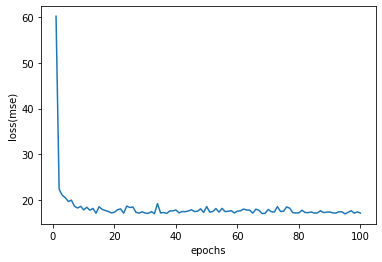

In [58]:
plt.plot(range(1, 101), history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss(mse)')
plt.show()

- loss 값이 60부근에서 시작해서 급속도로 떨어지다가 17부근에서 거의 값의 차이가 없음을 확인할 수 있다.

> 5.모델 평가
- 테스트 데이터에 대해서 약 30.77의 오차가 생겼음을 알 수 있다.

In [59]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 30.7710


30.771007537841797

>6.모델 예측
- 모델이 X_test에 따라 예측한 결과값 출력

In [61]:
pred = model.predict(X_test)
pred

array([[11.944424],
       [11.944424],
       [11.944424],
       [10.985075],
       [10.985075],
       [11.944424],
       [10.985075],
       [10.985075],
       [10.025726],
       [11.944424],
       [11.944424],
       [10.985075],
       [12.903772],
       [12.903772],
       [10.985075],
       [10.025726],
       [10.025726],
       [11.944424],
       [10.985075],
       [10.985075],
       [10.985075],
       [10.025726],
       [11.944424],
       [10.985075],
       [12.903772],
       [11.944424],
       [10.985075],
       [10.025726],
       [11.944424],
       [10.025726],
       [10.025726],
       [10.025726],
       [12.903772],
       [10.985075],
       [10.985075],
       [10.985075],
       [10.025726],
       [10.985075],
       [10.025726],
       [10.985075],
       [10.985075],
       [12.903772],
       [10.985075],
       [10.025726],
       [12.903772],
       [10.025726],
       [10.985075],
       [10.025726],
       [10.025726],
       [10.985075],


In [ ]:
!git add .
!git commit -m "up"